In [5]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configuration of the plots we will create 

# Read in the data 

import os 
os.getcwd
os.chdir('/Users/HadjerBoukhatem/Downloads')

df= pd.read_csv(r'/Users/HadjerBoukhatem/Downloads/movies 2.csv')


In [78]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [59]:
# Let's see if there is any missing data 

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
    
df = df.dropna()
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [34]:
# Data Types for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
# Change data type of columns 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')



In [79]:
# Create correct year column 

df['yearcorrect']=df['released'].str.extract(pat='([0-9]{4})').astype(int)

In [44]:
df.sort_values(by=['gross'],inplace= False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [47]:
pd.set_option('display.max_rows', None)

In [80]:
# Drop any duplicates 

df.drop_duplicates()

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [ ]:
# Let's start looking at correlation

In [70]:
df.corr(method='pearson')

df.corr(method='kendall')

df.corr(method='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


In [ ]:
# High correlation between budget and gross

In [66]:
correlation_matrix= df.corr(method='pearson')

<function matplotlib.pyplot.show(close=None, block=None)>

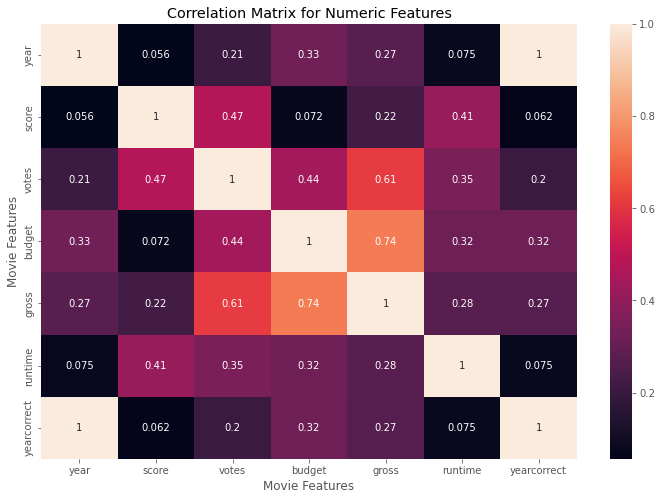

In [68]:
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [69]:
correlation_mat = df.corr(method='pearson')



corr_pairs = correlation_mat.unstack()

corr_pairs

year         year           1.000000
             score          0.056386
             votes          0.206021
             budget         0.327722
             gross          0.274321
             runtime        0.075077
             yearcorrect    0.998726
score        year           0.056386
             score          1.000000
             votes          0.474256
             budget         0.072001
             gross          0.222556
             runtime        0.414068
             yearcorrect    0.061923
votes        year           0.206021
             score          0.474256
             votes          1.000000
             budget         0.439675
             gross          0.614751
             runtime        0.352303
             yearcorrect    0.203098
budget       year           0.327722
             score          0.072001
             votes          0.439675
             budget         1.000000
             gross          0.740247
             runtime        0.318695
 

In [73]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

year         score          0.056386
score        year           0.056386
yearcorrect  score          0.061923
score        yearcorrect    0.061923
             budget         0.072001
budget       score          0.072001
runtime      year           0.075077
year         runtime        0.075077
yearcorrect  runtime        0.075294
runtime      yearcorrect    0.075294
yearcorrect  votes          0.203098
votes        yearcorrect    0.203098
             year           0.206021
year         votes          0.206021
gross        score          0.222556
score        gross          0.222556
gross        yearcorrect    0.268721
yearcorrect  gross          0.268721
year         gross          0.274321
gross        year           0.274321
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
yearcorrect  budget         0.320312
budget       yearcorrect    0.320312
             year           0.327722
y

In [75]:
high_corr= sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest coorelation to gross earnings